# 회귀

## 랜덤시드

In [4]:
# # 사전설치 : pip install numpy
import random
import numpy as np

# Random seed 설정
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number1 = random.random()   # 0이상 1미만의 난수를 생성
numpy_array1 = np.random.rand(3)   # 0이상 1미만의 난수를 3개 생성

print("첫 번째 실행:")
print("Python random:", random_number1)
print("NumPy array:", numpy_array1)

첫 번째 실행:
Python random: 0.6394267984578837
NumPy array: [0.37454012 0.95071431 0.73199394]


In [ ]:
# 다시 실행 (random seed 설정 X)
random_number2 = random.random()
numpy_array2 = np.random.rand(3)

print("\n두 번째 실행 (seed 설정 X):")
print("Python random:", random_number2)
print("NumPy array:", numpy_array2)
# 시드값을 주지 않으면 실행할 때마다 값이 변한다


두 번째 실행 (seed 설정 X):
Python random: 0.22321073814882275
NumPy array: [0.70807258 0.02058449 0.96990985]


In [ ]:
# Random seed 설정 후 다시 실행
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number3 = random.random()
numpy_array3 = np.random.rand(3)

print("\n세 번째 실행 (seed 설정):")
print("Python random:", random_number3)
print("NumPy array:", numpy_array3)
# 첫 값과 같다


세 번째 실행 (seed 설정):
Python random: 0.6394267984578837
NumPy array: [0.37454012 0.95071431 0.73199394]


## 선형회귀

In [9]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 확인
print(os.listdir())  # 현재 디렉토리의 파일 목록 확인

c:\pythontest\313
['313_01_numpy.ipynb', '313_02_pandas.ipynb', '313_03_matplotib.ipynb', '313_04_seaborn.ipynb', '313_05_EDA.ipynb', '313_06_ml.ipynb', 'dataset', 'report']


In [10]:
%pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 12.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 11.9 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 사전설치 : pip install numpy scikit-learn : 머신러닝에 필요한 프레임워크
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # 데이터를 교육/시험값으로 활용하기 위해 분리
from sklearn.metrics import r2_score, mean_squared_error # 성과지표 확인. 얼마나 교육이 잘 되었는지 평가
import random

# 재현성(난수가 동일한 순서대로 출력)을 위해 random seed 설정
random.seed(42)
np.random.seed(42)

# 데이터 준비
X = np.array([[1], [2], [3], [4], [5]])  # 독립 변수
y = np.array([2, 4, 5, 4, 5])  # 종속 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# test_size=0.4 교육값을 60%, 훈련값을 40% 

# 모델 생성 및 학습
model = LinearRegression() # 교육시키기
model.fit(X_train, y_train) # 

# 예측 및 평가
predictions = model.predict(X_test)

# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):", model.coef_[0])
print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 실제 값:", y_test)
print("테스트 세트 예측 값:", predictions)
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))

학습 데이터 크기: 3
테스트 데이터 크기: 2

모델 계수:
기울기 (slope): 0.7857142857142857
절편 (intercept): 1.5714285714285716

테스트 세트 실제 값: [4 5]
테스트 세트 예측 값: [3.14285714 5.5       ]

모델 성능:
R² 점수: -0.9693877551020396
평균 제곱 오차 (MSE): 0.4923469387755099


데이터셋 크기: (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       63             72             35        0  33.6   
1            1       85             35             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

기술통계:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.783854      69.065104      20.536458   79.799479   
std       3.369578   32.025742      19.3

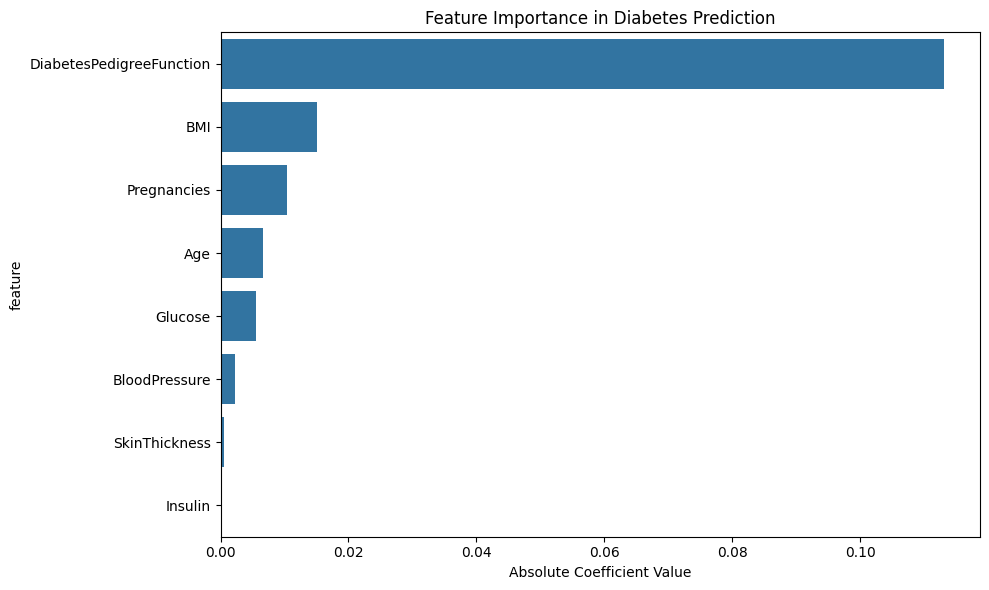

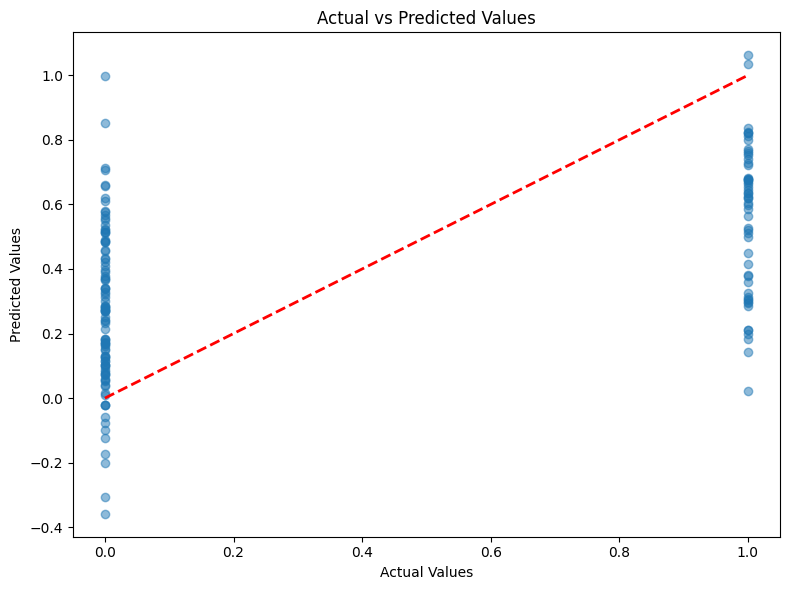

In [6]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('dataset/diabetes.csv')

# 데이터 확인
print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기술통계:")
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Outcome', axis=1)  # Outcome을 제외한 모든 특성
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도:")
print(feature_importance)

# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

## 다중선형회귀

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))

y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6, 2]])  # 공부 6시간, 과외 2시간
print(new_student)
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39
[[6 2]]

예측 점수: 86.5
R-squared: 0.9613
